### 08-2. 합성곱 신경망을 사용한 이미지 분류 ###

In [33]:
# 데이터 불러오기

from tensorflow import keras
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) =\
keras.datasets.fashion_mnist.load_data()
X_train = X_train.reshape(-1,28,28,1) / 255.0
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

##### 1) 합성곱 신경망 만들기 #####

In [34]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(28,28,1)))

In [35]:
# 풀링층 추가

model.add(keras.layers.MaxPooling2D(2))

In [36]:
# 첫번째 층 다음의 합성곱-풀링 층 추가

model.add(keras.layers.Conv2D(64, kernel_size=3, activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D(2))

In [37]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation="softmax"))

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               313700    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)              

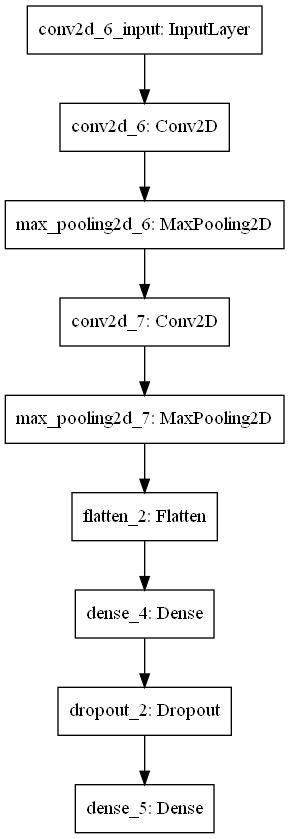

In [39]:
# 구성을 그림으로 표현

keras.utils.plot_model(model)

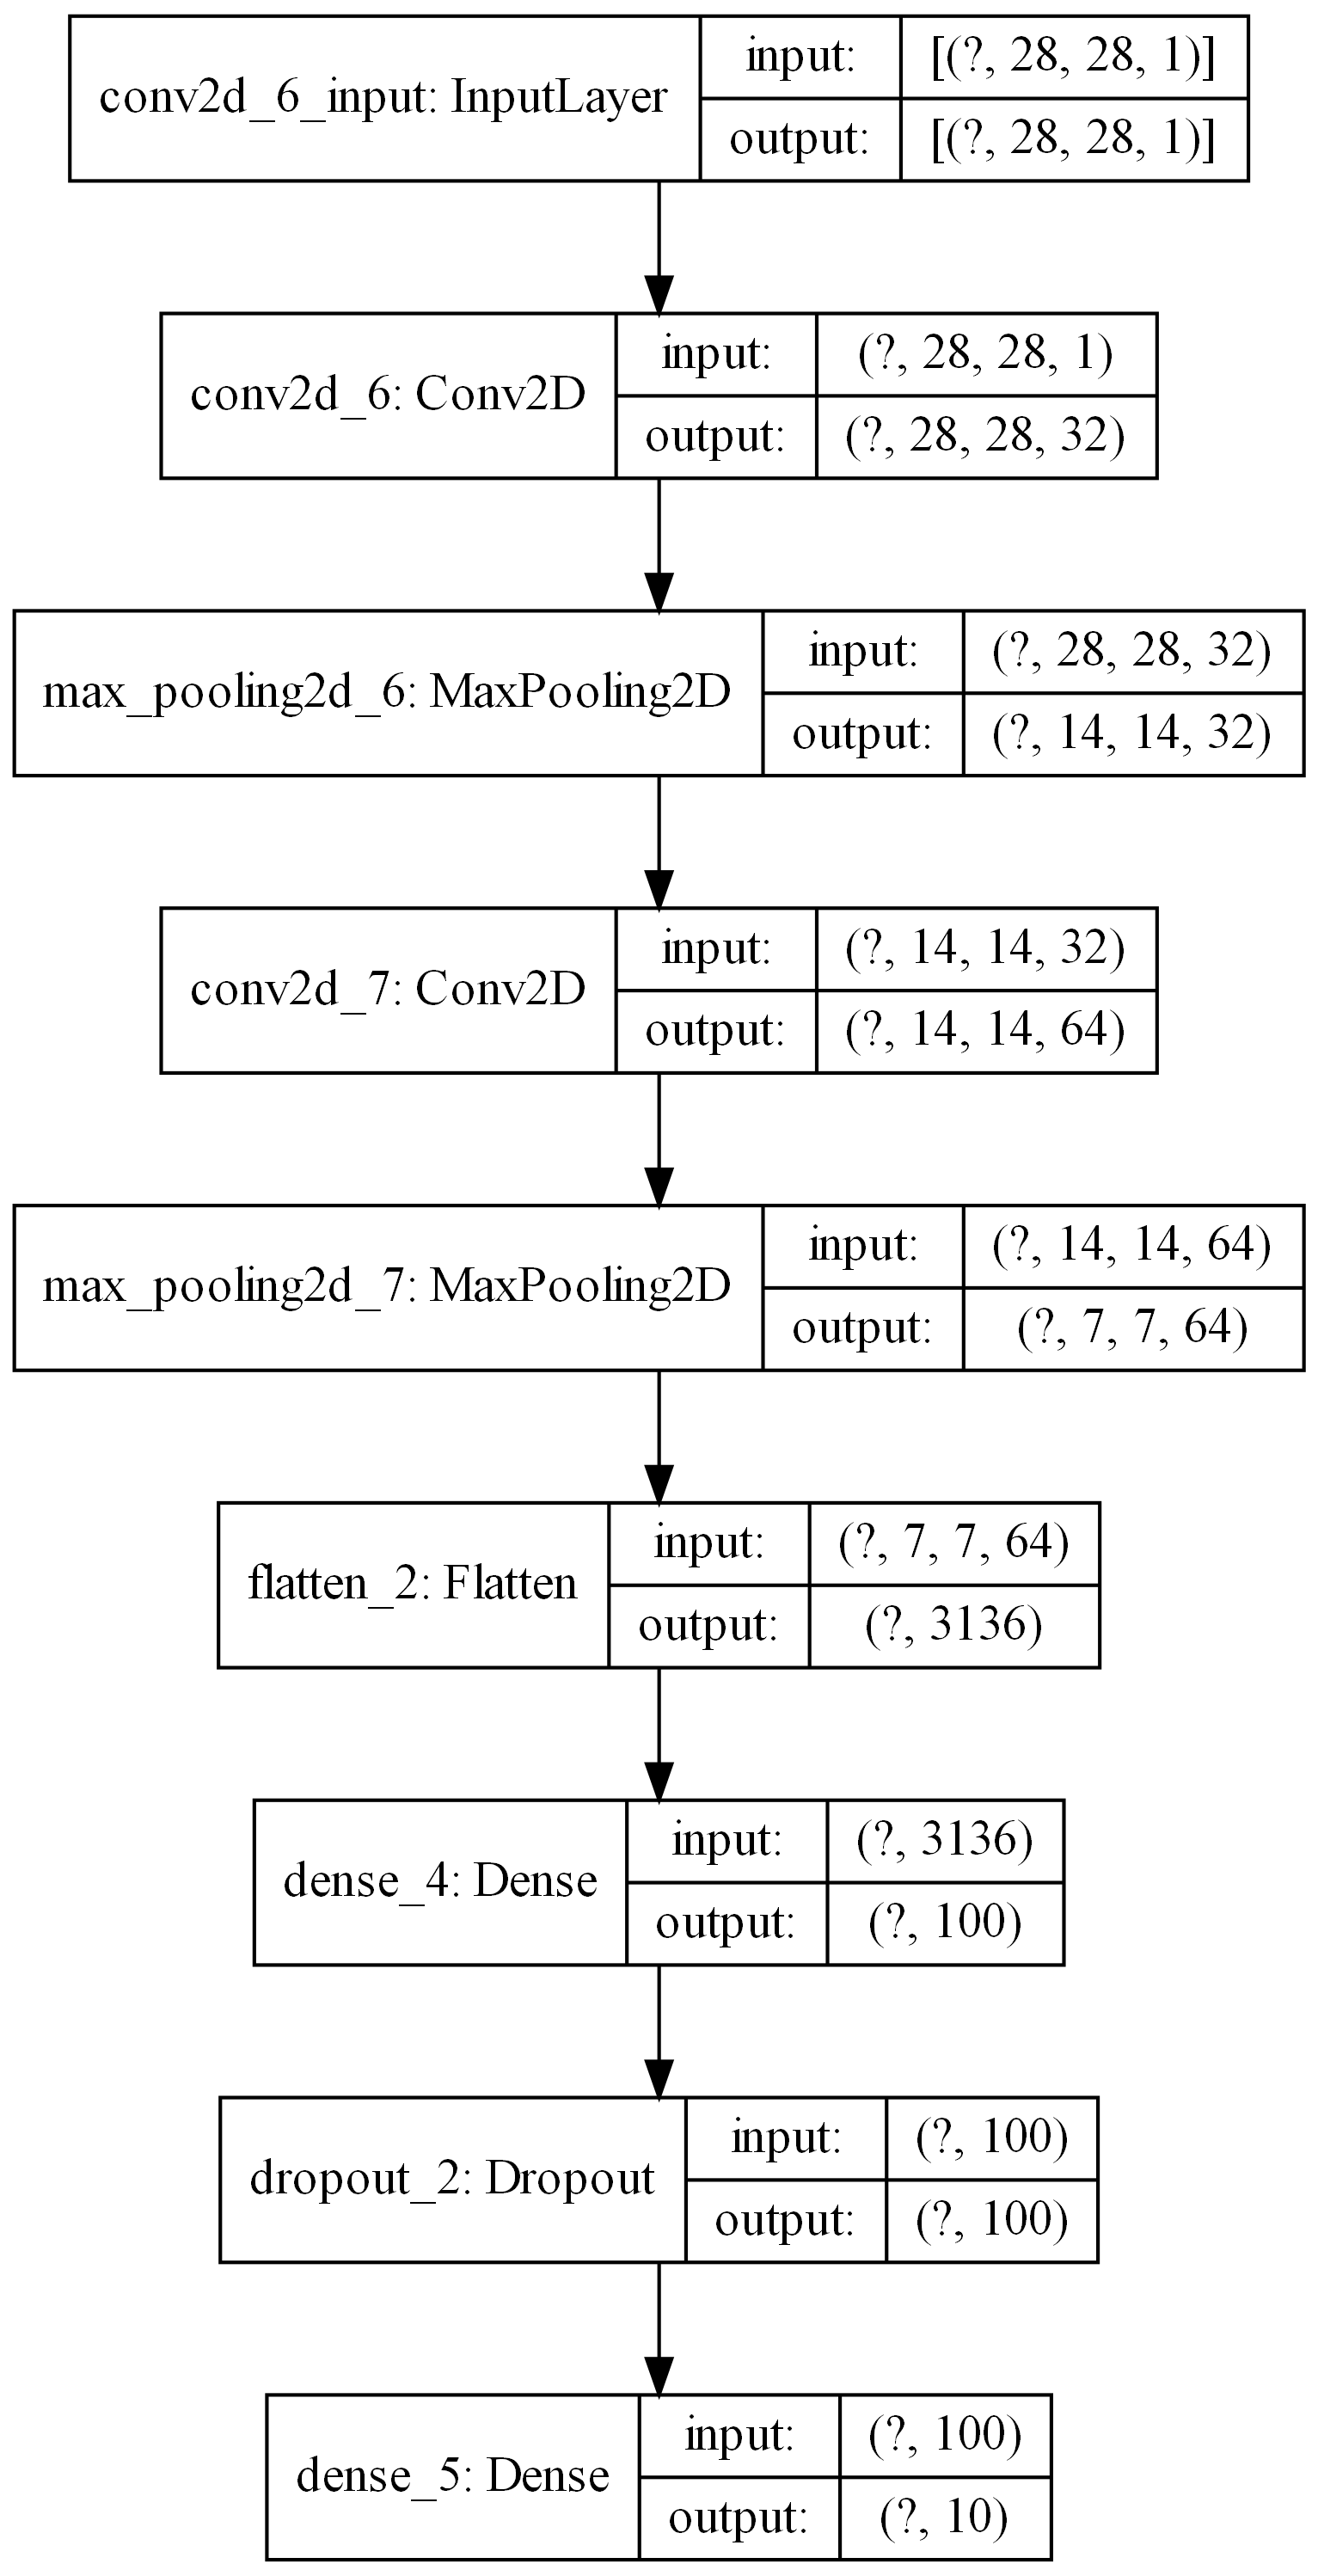

In [40]:
# 입출력 크기를 포함한 그래프

keras.utils.plot_model(model, show_shapes=True, to_file="cnn-architecture.png", dpi=300)

In [41]:
# 모델 컴파일

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.5424 - accuracy: 0.8023 - val_loss: 0.3486 - val_accuracy: 0.8721
Epoch 2/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3630 - accuracy: 0.8695 - val_loss: 0.2800 - val_accuracy: 0.8978
Epoch 3/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3140 - accuracy: 0.8867 - val_loss: 0.2566 - val_accuracy: 0.9028
Epoch 4/20
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2807 - accuracy: 0.8989 - val_loss: 0.2393 - val_accuracy: 0.9104
Epoch 5/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2535 - accuracy: 0.9076 - val_loss: 0.2400 - val_accuracy: 0.9132
Epoch 6/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2349 - accuracy: 0.9149 - val_loss: 0.2407 - val_accuracy: 0.9117


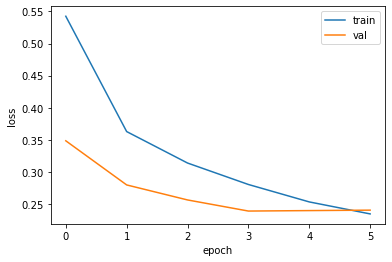

In [42]:
# 손실 그래프 그리기

import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

In [45]:
# 모델 평가

model.evaluate(X_test, y_test)

375/375 [==============================] - 2s 4ms/step - loss: 0.2393 - accuracy: 0.9104


[0.23931607604026794, 0.9104166626930237]

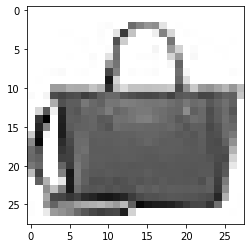

In [46]:
# 이미지 예측 - 이미지 나타내기

plt.imshow(X_test[0].reshape(28,28), cmap="gray_r")
plt.show()

In [50]:
# 이미지 예측

preds = model.predict(X_test[0:1])
print(preds)

[[1.7778922e-14 2.1564737e-23 8.4965015e-18 2.1289257e-18 3.7452324e-16
  2.0865677e-13 2.4740231e-15 2.6370499e-13 1.0000000e+00 3.4687683e-18]]


array([1.7778922e-14, 2.1564737e-23, 8.4965015e-18, 2.1289257e-18,
       3.7452324e-16, 2.0865677e-13, 2.4740231e-15, 2.6370499e-13,
       1.0000000e+00, 3.4687683e-18], dtype=float32)

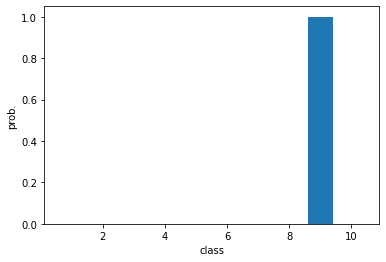

In [48]:
# 예측 결과 그래프로 나타내기

plt.bar(range(1,11), preds[0])
plt.xlabel("class")
plt.ylabel("prob.")
plt.show()

In [53]:
# 데이터셋의 레이블

classes = ["티셔츠", "바지", "스웨터", "드레스", "코트", "샌달", "셔츠", "스니커즈", "가방", "앵클 부츠"]

In [54]:
import numpy as np

print(classes[np.argmax(preds)])

가방


In [55]:
# test set 측정

test_scaled = X_test.reshape(-1,28,28,1) / 255.0

In [56]:
# test set 성능

model.evaluate(X_test, y_test)

375/375 [==============================] - 2s 4ms/step - loss: 0.2393 - accuracy: 0.9104


[0.23931607604026794, 0.9104166626930237]